In [26]:
#===Импорт необходимых библиотек
import re # работа с регулярными выражениями
import pandas as pd # работа с таблицами
import matplotlib.pyplot as plt # работа с графиками
import seaborn as sns # работа с графиками
import numpy as np # операции с массивами и матрицами


In [27]:
# чтение датасетов (обучение, тест. валидация)
from google.colab import files # для загрузки файлов
uploaded = files.upload()


Saving dataset_train.txt to dataset_train (4).txt


In [28]:
import io # операции с файлами
#датасет для обучения
DataTrain_Arr = pd.read_csv(io.BytesIO(uploaded['dataset_train (4).txt']), header=None, sep=';', names=['Выражения','Эмоции'], encoding='utf-8')


In [29]:
# чтение датасетов (обучение, тест. валидация)
uploaded = files.upload()

Saving dataset_test.txt to dataset_test (3).txt


In [30]:
DataTest_Arr = pd.read_csv(io.BytesIO(uploaded['dataset_test (3).txt']), header=None, sep=';', names=['Выражения','Эмоции'], encoding='utf-8')

In [31]:
# чтение датасетов (обучение, тест. валидация)
uploaded = files.upload()

Saving dataset_validation.txt to dataset_validation (1).txt


In [32]:
DataValidation_Arr = pd.read_csv(io.BytesIO(uploaded['dataset_validation (1).txt']), header=None, sep=';', names=['Выражения','Эмоции'], encoding='utf-8')

In [33]:
#===добавление столбца с закодированными эмоциями
ems_to_classes = {'anger': 0, 'love': 1, 'fear': 2, 'joy': 3, 'sadness': 4,'surprise': 5}
classes_to_ems = {j:i for i,j in ems_to_classes.items()}

DataTrain_Arr['Classes'] = DataTrain_Arr['Эмоции'].replace(ems_to_classes)
DataTest_Arr['Classes'] = DataTest_Arr['Эмоции'].replace(ems_to_classes)
DataValidation_Arr['Classes'] = DataValidation_Arr['Эмоции'].replace(ems_to_classes)

In [34]:
DataTrain_Arr.head()

,Выражения,Эмоции,Classes
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,1
4,i am feeling grouchy,anger,0


In [35]:
def Func_EmotionsShow(dataframe_loc, title='the'):
  '''
  Вход - фрейм данных со столбцом 'Эмоции' и заголовок набора данных (например,
  'train').
  Выход - гистограмма с количеством элементов каждой категории.

  '''
  # создание серии pandas с классами и их количеством
  classes_quantity = dataframe_loc['Эмоции'].value_counts()

  # количество уникальных категорий
  x_barchart = range(dataframe_loc['Эмоции'].nunique())
  # список классов
  x_barchart_classes = [str(ems_to_classes[em]) +\
                       ' - ' + em for em in list(classes_quantity.index)]

  # подсчет количества
  y_barchart = list(classes_quantity.values)

  # создание диаграммы
  plt.figure(figsize = (5, 4))
  plt.bar(x_barchart, y_barchart, color='#707bfb')

  # добавление кол-ва элемент ов для каждой категории на графике в виде текста
  for ind, info in enumerate(y_barchart):
    plt.text(x = ind,
            y = info+max(y_barchart)/100,
            s = '{}'.format(info),
            fontdict = dict(fontsize=10),
            ha = 'center',)

  plt.xticks(x_barchart, x_barchart_classes, rotation=40)
  plt.title('Кол-во эл-тов каждой категории для {} датасета'.format(title))
  plt.tight_layout()

  print('Всего {} записей в датасете.\n'.format(len(dataframe_loc.index)))

  plt.show()

Всего 16000 записей в датасете.



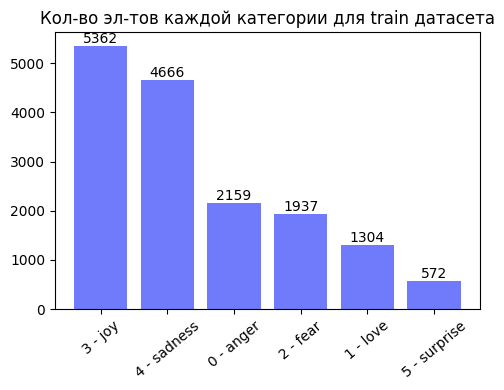

Всего 2000 записей в датасете.



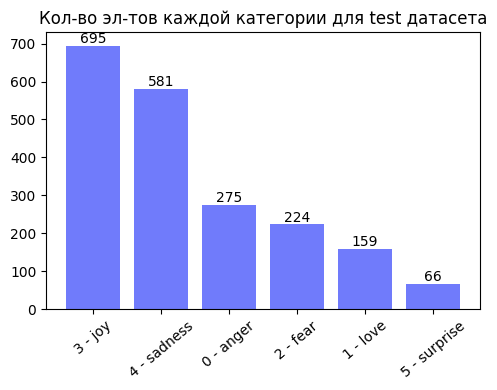

Всего 2000 записей в датасете.



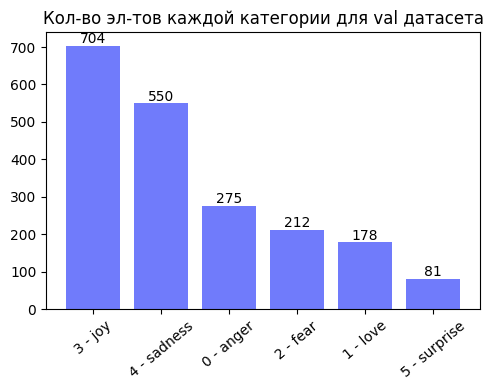

In [36]:
Func_EmotionsShow(DataTrain_Arr, 'train')
Func_EmotionsShow(DataTest_Arr, 'test')
Func_EmotionsShow(DataValidation_Arr, 'validation')

In [37]:
#=====================================================Предварительная обработка текста
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# загрузка списка стоп-слов
STOPWORDS = set(stopwords.words('english'))

# tokenizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Текст в наборе данных кажется достаточно 'чистым', поэтому не требует большого количества шагов предварительной обработки, а только удаления стоп-слов и разбиения на токены.

In [38]:
def Func_TP(t_loc, sw_loc=False):
  '''
  Вход - текст (одна строка) и
  параметры предварительной обработки
  Выход - предварительно обработанный текст

  '''
  # очистка текста от стоп-слов
  t_loc = re.sub(r'\W+', ' ', t_loc).lower()

  # разбиение текста на токены
  tokens = word_tokenize(t_loc)

  if sw_loc:
    # удаление стоп-слов
    tokens = [token for token in tokens if token not in STOPWORDS]

  return tokens

In [42]:
print('До предварительной обработки: ')
print(DataTrain_Arr.head())

x_train = [Func_TP(t, sw_loc=True) for t in DataTrain_Arr['Выражения']]
y_train = DataTrain_Arr['Classes'].values

print('\nПосле предварительной обработки:')
for exp_and_classes in list(zip(x_train[:5], y_train[:5])):
  print(exp_and_classes)

До предварительной обработки: 
                                           Выражения   Эмоции  Classes
0                            i didnt feel humiliated  sadness        4
1  i can go from feeling so hopeless to so damned...  sadness        4
2   im grabbing a minute to post i feel greedy wrong    anger        0
3  i am ever feeling nostalgic about the fireplac...     love        1
4                               i am feeling grouchy    anger        0

После предварительной обработки:
(['didnt', 'feel', 'humiliated'], 4)
(['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake'], 4)
(['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'], 0)
(['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], 1)
(['feeling', 'grouchy'], 0)


In [43]:
x_test = [Func_TP(t, sw_loc=True) for t in DataTest_Arr['Выражения']]
y_test = DataTest_Arr['Classes'].values

x_validation = [Func_TP(t, sw_loc=True) for t in DataValidation_Arr['Выражения']]
y_validation = DataValidation_Arr['Classes'].values

**Вложения слов**
Некоторые слова могут быть специфичными для этого набора данных, поэтому  используется комбинация предварительно обученной модели fastText и модели Word2vec, обученной на наборе данных.

Встречаемость слов в наборе должна быть >=2, остатки, вероятно, являются опечатками или терминами, не имеющими смыслового значения.

In [44]:
# загрузка предварительно обученной модели
import gensim.downloader as api
model_wiki = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [45]:
from gensim.models import Word2Vec

# обучение word2vec модели на наборе (корпусе) данных
model_w2v = Word2Vec(x_train + x_test + x_validation,          # данные для модели обучения
                 vector_size = 300,                            # размер вектора внедрения
                 min_count = 2).wv

**Преобразование предложений в векторы**

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [47]:
DICT_SIZE = 15000

# создание словаря наиболее часто встречающихся слов,
# в котором количество слов соответствует DICT_SIZE
tokenizer = Tokenizer(num_words=DICT_SIZE)
total_words = x_train + x_train + x_validation
tokenizer.fit_on_texts(total_words)

In [48]:
# слова и соответствующие им индексы
list(tokenizer.word_index.items())[:5]

[('feel', 1), ('feeling', 2), ('like', 3), ('im', 4), ('really', 5)]

In [49]:
# кол-во уникальных слов в корпусе (наборе) данных
len(tokenizer.word_index)

16045

In [51]:
# поиск наибольшей длины предложения во всех частях набора данных (обучение,
# тест, валидация)
x_train_max_length = max([len(i) for i in x_train])
x_test_max_length = max([len(i) for i in x_test])
x_validation_max_length = max([len(i) for i in x_validation])

MAX_LEN = max(x_train_max_length, x_test_max_length, x_validation_max_length)

In [52]:
# наибольшая длина предложения составляет
MAX_LEN

35

In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [55]:
# замена слов на их индексы,
# замена размера векторов на MAX_LEN дозаполнение индексами
X_train = tokenizer.texts_to_sequences(x_train)
X_train_add = pad_sequences(X_train, maxlen=MAX_LEN)

X_test = tokenizer.texts_to_sequences(x_test)
X_test_add = pad_sequences(X_test, maxlen=MAX_LEN)

X_validation = tokenizer.texts_to_sequences(x_validation)
X_validation_add = pad_sequences(X_validation, maxlen=MAX_LEN)

In [56]:
# Пример замены слов на их индексы
X_train[0]

[51, 1, 556]

In [57]:
# предложения после дополнения (дозаполнения)
X_train_add[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  51,   1, 556], dtype=int32)

**Матрица внедрения (вложений)**

In [59]:
def Func_MatrixOfWeights(mod_loc, secmod_loc=False):
  '''
  Вход - модель встраивания (внедрения) слов и
         вторая модель (опционально)
  Выход - матрица весов размера m x n, где
          m - размер словаря,
          n - размер вектора встраивания слова

  '''
  vec_length = mod_loc.get_vector('like').shape[0]
  weight_matr = np.zeros((DICT_SIZE, vec_length))
  words_skipped_vector = []

  for w_current, ind_current in tokenizer.word_index.items():
    if ind_current < DICT_SIZE:
      if w_current in mod_loc.key_to_index:
        weight_matr[ind_current] = mod_loc.get_vector(w_current)
      else:
        if secmod_loc:
          if w_current in secmod_loc.key_to_index:
            weight_matr[ind_current] = secmod_loc.get_vector(w_current)
          else:
            words_skipped_vector.append(w_current)
        else:
          words_skipped_vector.append(w_current)

  print(f'{len(words_skipped_vector)} слова были пропущены. Некоторые из них:')
  print(words_skipped_vector[:50])
  return weight_matr

In [60]:
Weight_Matr = Func_MatrixOfWeights(model_wiki, model_w2v)

991 слова были пропущены. Некоторые из них:
['jacynthe', 'rupaul', 'kayle', 'gerling', 'mxm', 'dannika', 'hyperchondria', 'manitz', 'educationg', 'gosman', 'montauk', 'bummin', 'wheeeeee', 'underwears', 'olivias', 'bandhu', 'uplifter', 'suicidalness', 'dykey', 'provokingbeauty', 'bodypump', 'honkerblonked', 'clermont', 'instructables', 'janne', 'suominen', 'kamiki', 'nozomi', 'nonchan', 'beaubronz', 'docrat', 'allthingsbucks', 'irresponcible', 'scruncher', 'utf', 'isprivate', 'ismobile', 'mobileclass', 'isprivateblog', 'languagedirection', 'feedlinks', 'lorena', 'handss', 'nervs', 'mommyhood', 'nowwwwww', 'whitleys', 'forelorn', 'baachan', 'covingtons']


In [61]:
Weight_Matr.shape

(15000, 300)

**DL модель**

In [62]:
# импорт моделей, слоев, оптимизаторов из tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [63]:
# импорт и инициализация ранней остановки
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [64]:
# инициализация последовательной модели
model = Sequential()
model.add(Embedding(input_dim = DICT_SIZE, # весь словарный запас (размер словаря)
                    output_dim = Weight_Matr.shape[1], # размерность весового вектора
                    input_length = X_train_add.shape[1], # максимальная длина предложения
                    weights=[Weight_Matr], # присваивание веса внедрения с помощью матрицы внедрения
                    trainable=False)) # установка веса, который неволзможно обучать (статического)

In [65]:
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [66]:
history = model.fit(X_train_add, y_train,
                    validation_data = (X_validation_add, y_validation),
                    batch_size = 8,
                    epochs = 20,
                    callbacks = stop)

Epoch 1/20
2000/2000 [==============================] - 818s 404ms/step - loss: 0.8981 - accuracy: 0.6737 - val_loss: 0.3570 - val_accuracy: 0.8825
Epoch 2/20
2000/2000 [==============================] - 798s 399ms/step - loss: 0.2589 - accuracy: 0.9025 - val_loss: 0.1762 - val_accuracy: 0.9210
Epoch 3/20
2000/2000 [==============================] - 797s 398ms/step - loss: 0.1678 - accuracy: 0.9269 - val_loss: 0.1420 - val_accuracy: 0.9300
Epoch 4/20
2000/2000 [==============================] - 801s 401ms/step - loss: 0.1356 - accuracy: 0.9339 - val_loss: 0.1407 - val_accuracy: 0.9365
Epoch 5/20
2000/2000 [==============================] - 806s 403ms/step - loss: 0.1225 - accuracy: 0.9414 - val_loss: 0.1332 - val_accuracy: 0.9380
Epoch 6/20
2000/2000 [==============================] - 809s 405ms/step - loss: 0.1132 - accuracy: 0.9404 - val_loss: 0.1478 - val_accuracy: 0.9310
Epoch 7/20
2000/2000 [==============================] - 808s 404ms/step - loss: 0.1067 - accuracy: 0.9433 - val_

**Оценка модели**

Графики точности обучения, тестирования и потерь

In [68]:
def Func_ViewStat(history):
    '''
    Графики точности и потерь обучающей и
    валидационной выборок
    Вход - hisory (объект Keras.callback.History)
    Выход - нет значений
    '''
    l_value = history.history['loss']
    a_value = history.history['accuracy']
    l_value_value = history.history['val_loss']
    a_value_valuel = history.history['val_accuracy']
    x = range(1, len(l_value) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, a_value, label='Точность обучения', color='#707bfb')
    plt.plot(x, a_value_valuel, label='Точность валидации', color='#fbcbff')
    plt.title('Точность обучения и валидации')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, l_value, label='Потери обучения', color='#707bfb')
    plt.plot(x, l_value_value, label='Потери валидации', color='#fbcbff')
    plt.title('Потери обучения и валидации')
    plt.grid(True)
    plt.legend()

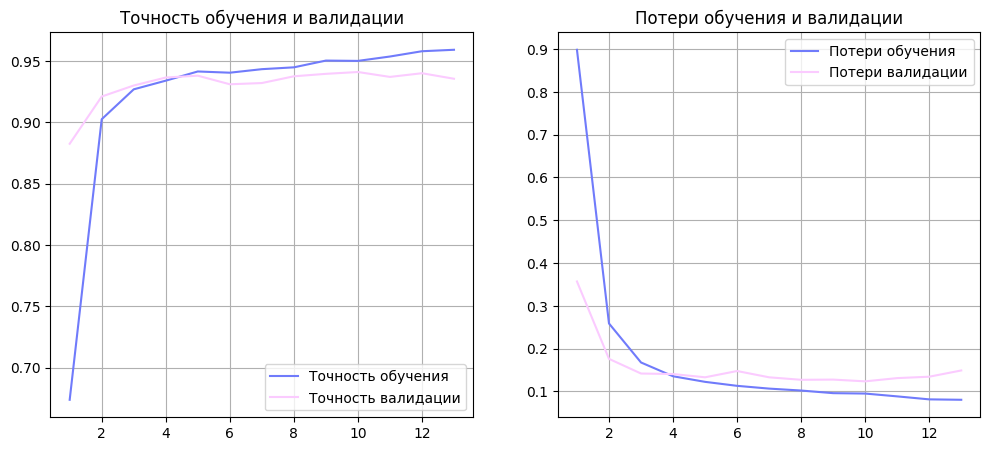

In [69]:
#===Вызов функции построения графиков
Func_ViewStat(history)

Точность модели на тестовых данных

In [70]:
model.evaluate(X_test_add, y_test)

63/63 [==============================] - 15s 179ms/step - loss: 0.1614 - accuracy: 0.9295


[0.16140452027320862, 0.9294999837875366]

In [71]:
y_pred = np.argmax(model.predict(X_test_add), axis=1)

63/63 [==============================] - 14s 189ms/step


Точность, отклик, F1-метрика на тестовых данных

In [72]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       275
           1       0.82      0.85      0.84       159
           2       0.86      0.92      0.89       224
           3       0.95      0.95      0.95       695
           4       0.96      0.98      0.97       581
           5       0.80      0.68      0.74        66

    accuracy                           0.93      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.93      0.93      0.93      2000



Матрица путаницы

In [73]:
# установка пользовательской цветовой схемы
from matplotlib.colors import LinearSegmentedColormap
colors = ['#ffffff', '#fbcbff', '#707bfb']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

In [87]:
def Func_ViewCMatr(matr_loc, fmt_loc=''):
  '''
  Вход - матрица путаницы и параметр формата
  Показывает матрицу в виде тепловой карты
  Выход - нет параметров

  '''
  plt.figure(figsize=(6, 5))
  sns.heatmap(matr_loc, annot=True,
              cmap=cmap,
              fmt=fmt_loc,
              xticklabels=ems_to_classes.keys(),
              yticklabels=ems_to_classes.keys())
  plt.ylabel('Фактические классы')
  plt.xlabel('Предсказанные классы')
  plt.show()

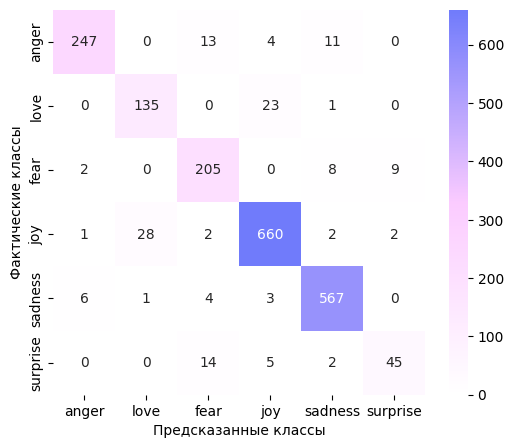

In [88]:
res_matr = metrics.confusion_matrix(y_test, y_pred)
Func_ViewCMatr(res_matr)

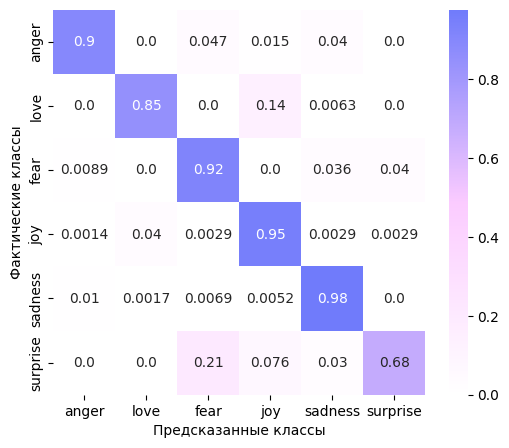

In [89]:
# формирование новой матрицы путаницы
# где значения нормированы по строкам
res_matr_new = np.zeros(res_matr.shape)

for row_current in range(len(res_matr)):
  sum_temp = np.sum(res_matr[row_current])
  for element_current in range(len(res_matr[row_current])):
    res_matr_new[row_current][element_current] = res_matr[row_current][element_current] / sum_temp

Func_ViewCMatr(res_matr_new, fmt_loc='.2')

**Тестирование модели на данных пользователя**

In [81]:
def Func_Predict(user_text):
  '''
  Вход  - строка или массив (если несколько строк)
  Выдает само предложение и соответствующую ему эмоцию
  Выход - ничего

  '''
  tp = [Func_TP(t_current) for t_current in user_text]
  sequences = tokenizer.texts_to_sequences(tp)
  pad = pad_sequences(sequences, maxlen=MAX_LEN)

  predictions = model.predict(pad)
  labels = np.argmax(predictions, axis=1)

  for i, lbl in enumerate(labels):
    print(f'\'{user_text[i]}\' --> {classes_to_ems[lbl]}')

In [86]:
test_texts = ['I am so happy', 'I feel lonely', 'The guests felt satisfied']

Func_Predict(test_texts)

1/1 [==============================] - 0s 114ms/step
'I am so happy' --> joy
'I feel lonely' --> sadness
'The guests felt satisfied' --> joy
